<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/pc_cl_hc_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/PyCaret.png?raw=true)

# **Clustering**

## **Instalando PyCaret**

In [1]:
!pip install --pre pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Habilitando bibliotecas necesarias**

### **Para el tratamiento de los datos**

In [2]:
import pandas as pd
import numpy as np

### **PyCaret**

In [3]:
from pycaret.clustering import *

## **Extracción de Datos - Creación del DataFrame**

In [4]:
archivo = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/credit_card.csv"

In [5]:
datos = pd.read_csv(archivo)
datos.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### **Limpieza**

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
datos = datos.drop(columns=["CUST_ID"]) #se eliminan las variables no relevantes para este problema
datos.head(3) #vista del dataframe

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [8]:
datos.shape

(8950, 17)

### **Dividiendo el conjunto de datos**

In [9]:
datos = datos.sample(frac = 0.75, random_state=0)
datos_no_vistos = datos.drop(datos.index)

In [10]:
datos.reset_index(inplace=True, drop=True)
datos_no_vistos.reset_index(inplace=True, drop=True)

In [11]:
print("Datos para Modelar: " + str(datos.shape))
print("Datos no vistos para Predicciones: " + str(datos_no_vistos.shape))

Datos para Modelar: (6712, 17)
Datos no vistos para Predicciones: (0, 17)


In [12]:
datos.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,23.065122,0.700000,150.00,0.00,150.00,0.0,0.500000,0.000000,0.4,0.0,0,5,1500.0,229.736383,116.745902,1.000000,10
1,75.012641,0.545455,480.02,480.02,0.00,0.0,0.083333,0.083333,0.0,0.0,0,1,1950.0,485.738057,86.502541,0.000000,12
2,319.037744,0.818182,1262.28,1262.28,0.00,0.0,0.250000,0.250000,0.0,0.0,0,6,10500.0,1350.541585,218.810614,0.125000,12
3,182.085903,1.000000,1935.16,1935.16,0.00,0.0,0.833333,0.833333,0.0,0.0,0,26,13500.0,2559.793542,212.120690,0.416667,12
4,182.854647,1.000000,1978.87,765.85,1213.02,0.0,1.000000,0.750000,1.0,0.0,0,68,6000.0,1590.330808,167.136534,0.750000,12


In [13]:
datos_no_vistos.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


# **Configuración del entorno en PyCaret**

***La función ```setup()``` inicializa el entorno en PyCaret y prepara los datos para el modelo seleccionado y la implementación de ese modelo. La función ```setup()``` debe ser llamada antes de ejecutar cualquier función de PyCaret.*** 

***Se necesitan dos parámetros obligatorios:***
- Un marco de datos de Pandas y, 
- el nombre de la columna de destino. 

***Todos los demás parámetros son opcionales y se utilizan para personalizar el preprocesamiento de los datos.***

Cuando se ejecuta ```setup()```, el algoritmo de inferencia de PyCaret determina automáticamente los tipos de datos para todas las funciones en función de determinadas propiedades. 

El tipo de datos debe inferirse correctamente, pero no siempre es así. Para tener en cuenta esto, PyCaret muestra una tabla que contiene las características y sus tipos de datos inferidos después de que se ejecuta ```setup()```. 

Si todos los tipos de datos están identificados correctamente, se debe presionar enter para continuar o se puede ingresar salir para finalizar la experiencia. Asegurarse de que los tipos de datos sean correctos es  fundamental, ya que se realiza automáticamente algunas tareas de preprocesamiento que son imperativas para cualquier experimento de aprendizaje automático. 

Estas tareas se realizan de forma diferente para cada tipo de datos, por lo que es muy importante que estén configuradas correctamente.

In [14]:
agrupacion = setup(datos, session_id = 123, pca_components=3)

,Description,Value
0,Session id,123
1,Original data shape,"(6712, 17)"
2,Transformed data shape,"(6712, 17)"
3,Numeric features,17
4,Rows with missing values,3.4%
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,constant
9,Low variance threshold,0


***Una vez que la configuración se ha ejecutado con éxito, se muestra un cuadro de información que contiene elementos importantes. La mayor parte de la información está relacionada con el preprocesamiento que se construye cuando se ejecuta ```setup()```.*** 

# **Creación del Modelo**

In [15]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [16]:
print(f"Hay {len(models())} algoritmos para clustering")

Hay 9 algoritmos para clustering


## **Algoritmo Hierarchical Clustering**

In [17]:
hc = create_model('hclust', num_clusters=4)
print(hc)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3726,1670.6849,1.3813,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

AgglomerativeClustering(n_clusters=4)


# **Asignando el Modelo**

**Ahora que hemos creado un modelo, nos gustaría asignar las etiquetas de grupo a nuestro conjunto de datos ($300$ muestras) para analizar los resultados. Lo lograremos usando la función ```assign_model()```.**

In [18]:
hc_resultados = assign_model(hc)
hc_resultados.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,23.065123,0.700000,150.000000,0.000000,150.00000,0.0,0.500000,0.000000,0.4,0.0,0,5,1500.0,229.736389,116.745903,1.000000,10,Cluster 3
1,75.012642,0.545455,480.019989,480.019989,0.00000,0.0,0.083333,0.083333,0.0,0.0,0,1,1950.0,485.738068,86.502541,0.000000,12,Cluster 3
2,319.037750,0.818182,1262.280029,1262.280029,0.00000,0.0,0.250000,0.250000,0.0,0.0,0,6,10500.0,1350.541626,218.810608,0.125000,12,Cluster 1
3,182.085907,1.000000,1935.160034,1935.160034,0.00000,0.0,0.833333,0.833333,0.0,0.0,0,26,13500.0,2559.793457,212.120697,0.416667,12,Cluster 0
4,182.854645,1.000000,1978.869995,765.849976,1213.02002,0.0,1.000000,0.750000,1.0,0.0,0,68,6000.0,1590.330811,167.136536,0.750000,12,Cluster 1


In [19]:
hc_resultados.shape

(6712, 18)

# **Evaluación del Modelo**

In [20]:
evaluate_model(hc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Visualización del Modelo**

**La función ```plot_model()``` se puede utilizar para analizar diferentes aspectos del 
modelo de agrupamiento. Esta función toma un objeto de modelo entrenado y devuelve un gráfico.**

## **Visualización de los clusters**

In [21]:
plot_model(hc)

## **Visualización del Codo**

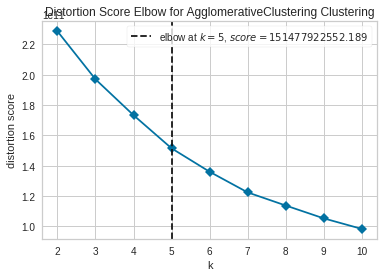

In [22]:
plot_model(hc, plot = 'elbow')

## **Visualización de la Distribución**

La gráfica de distribución muestra el tamaño de cada grupo. Al pasar el cursor sobre las barras, verá el número de muestras asignadas a cada grupo. En el ejemplo anterior, podemos observar que el grupo 3 tiene el mayor número de muestras. También podemos usar la gráfica de distribución para ver la distribución de etiquetas de clusters en asociación con cualquier otra característica numérica o categórica. 

In [23]:
plot_model(hc, plot = 'distribution')